In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

## 回归树

In [428]:
iris_dataset = load_iris()

X, y = iris_dataset['data'], iris_dataset['target']

X = pd.DataFrame(X, columns = iris_dataset['feature_names'])
y = pd.DataFrame(y, columns = ['Type'])

iris_df = X.join(y)

iris_df = iris_df[iris_df['Type'] != 0]
iris_df = iris_df.drop(['sepal width (cm)', 'petal length (cm)'], axis = 1)

iris_df['petal width (cm)'] = iris_df.apply(lambda row : row['petal width (cm)'] + 0.15 if row['Type'] == 1 else row['petal width (cm)'], axis = 1)

iris_df

,sepal length (cm),petal width (cm),Type
50,7.0,1.55,1
51,6.4,1.65,1
52,6.9,1.65,1
53,5.5,1.45,1
54,6.5,1.65,1
...,...,...,...
145,6.7,2.30,2
146,6.3,1.90,2
147,6.5,2.00,2
148,6.2,2.30,2


## 二特征预测

<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

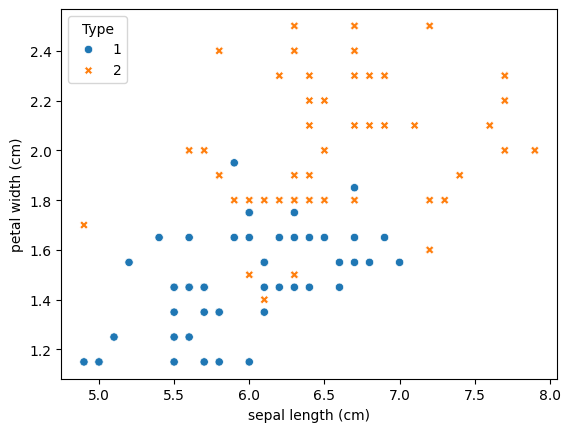

In [429]:
sns.scatterplot(data = iris_df, x = 'sepal length (cm)', y = 'petal width (cm)', hue = 'Type',
                style = 'Type', palette = 'tab10')

In [430]:
X = iris_df.drop(['Type'], axis = 1)
y = iris_df[['Type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13456)

clf = DecisionTreeClassifier()

y_pred = clf.fit(X_train, y_train).predict(X_test)

clf.score(X_test, y_test)

0.7666666666666667

In [431]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           1       0.67      0.83      0.74        12
           2       0.87      0.72      0.79        18

    accuracy                           0.77        30
   macro avg       0.77      0.78      0.76        30
weighted avg       0.79      0.77      0.77        30



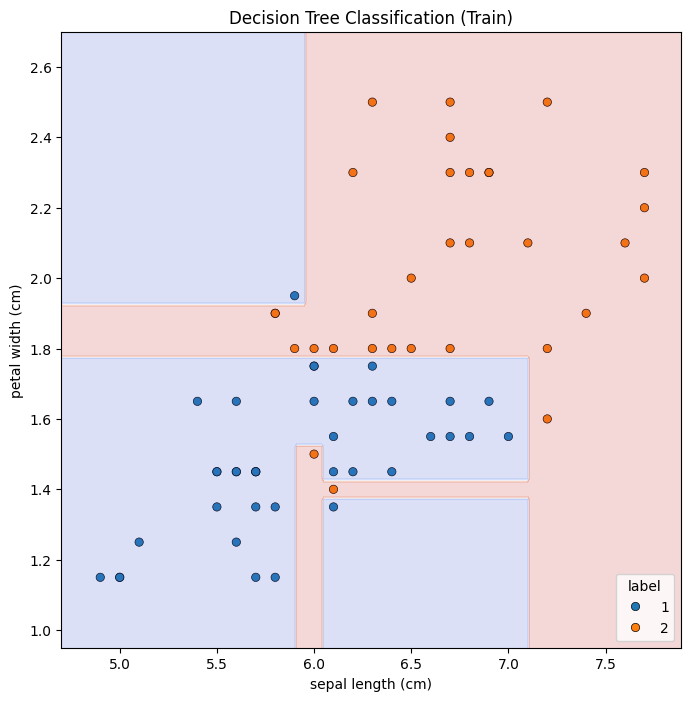

In [432]:
import sys
sys.path.append("../..")

from ToolKit.ML import plot_decision_boundary2F2D

plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Decision Tree Classification (Train)')

<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

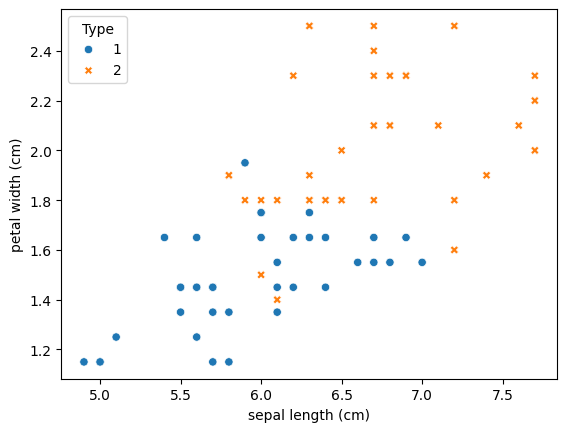

In [433]:
temp_df = X_train.join(y_train)
sns.scatterplot(data = temp_df, x = 'sepal length (cm)', y = 'petal width (cm)', hue = 'Type',
                style = 'Type', palette = 'tab10')

In [434]:
cnames = y_train['Type'].astype(str).unique()
cnames = np.sort(cnames)

cnames

array(['1', '2'], dtype=object)

In [435]:
export_graphviz(clf, out_file = 'Iris_tree_default.dot', 
                feature_names = X_train.columns,
                class_names = cnames)

In [436]:
importance = clf.feature_importances_

importance

array([0.09930099, 0.90069901])

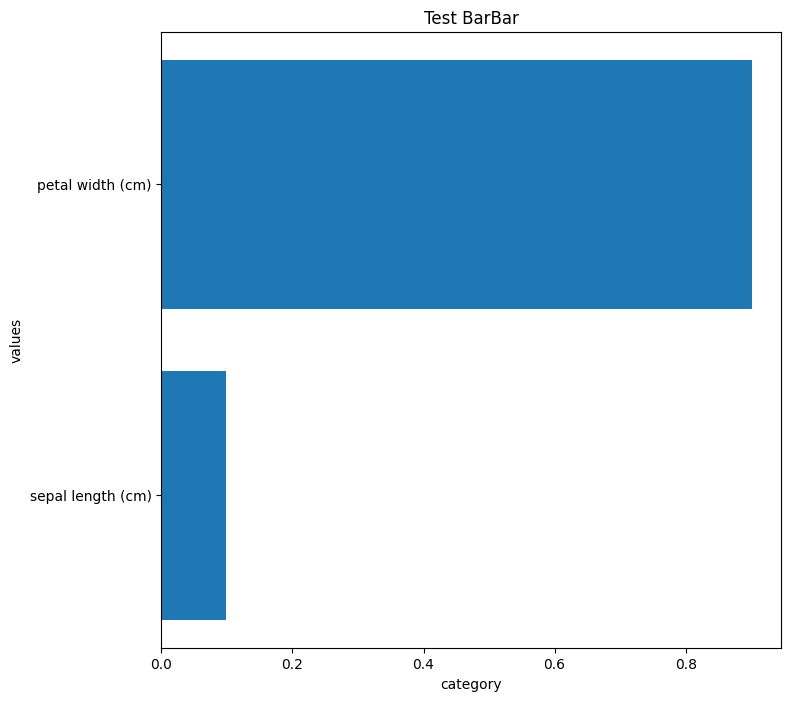

In [437]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

ax.barh(y = X_train.columns, width = importance)

ax.set_title('Test BarBar')
ax.set_xlabel('category')
ax.set_ylabel('values')

plt.show()

In [438]:
clf = DecisionTreeClassifier(max_depth = 3)

y_pred = clf.fit(X_train, y_train).predict(X_test)

clf.score(X_test, y_test)

0.8

In [439]:
export_graphviz(clf, out_file = 'Iris_tree_d3.dot', 
                feature_names = X_train.columns,
                class_names = cnames)

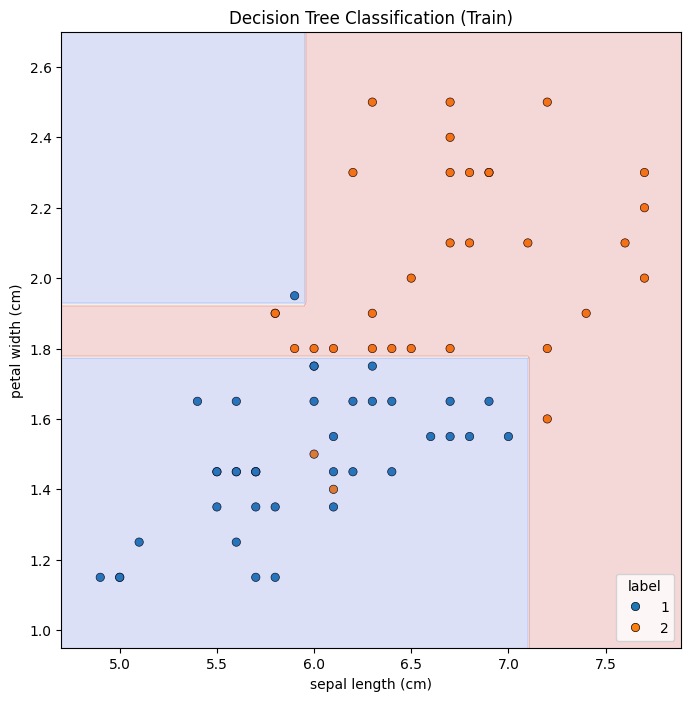

In [440]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Decision Tree Classification (Train)')

In [441]:
clf = DecisionTreeClassifier(max_depth = 1)

y_pred = clf.fit(X_train, y_train).predict(X_test)

clf.score(X_test, y_test)

0.9

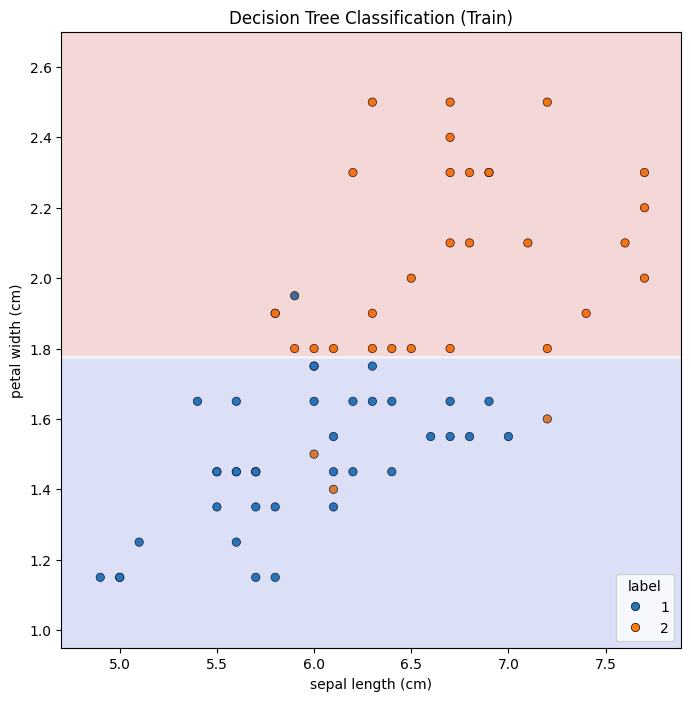

In [442]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Decision Tree Classification (Train)')

#### 不同分类深度

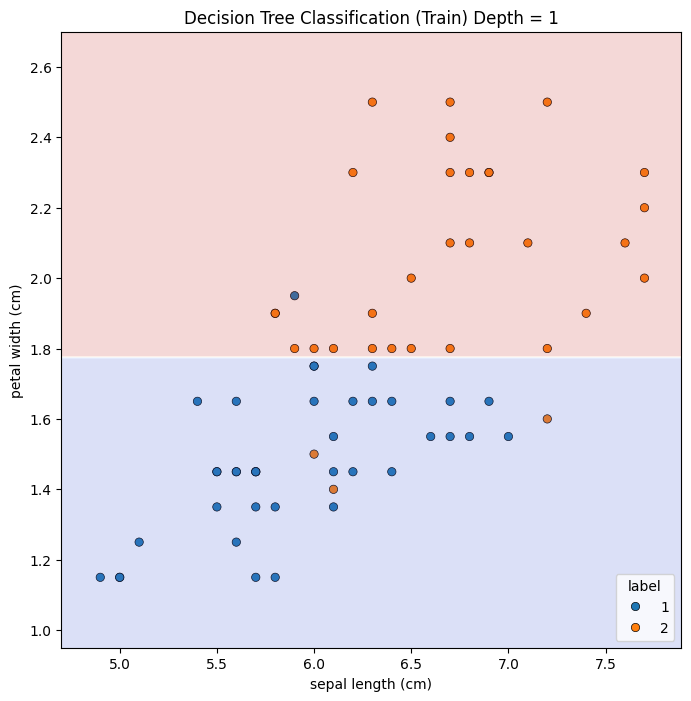

In [443]:
clf = DecisionTreeClassifier(max_depth = 1)

y_pred = clf.fit(X_train, y_train).predict(X_test)

plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Decision Tree Classification (Train) Depth = 1')

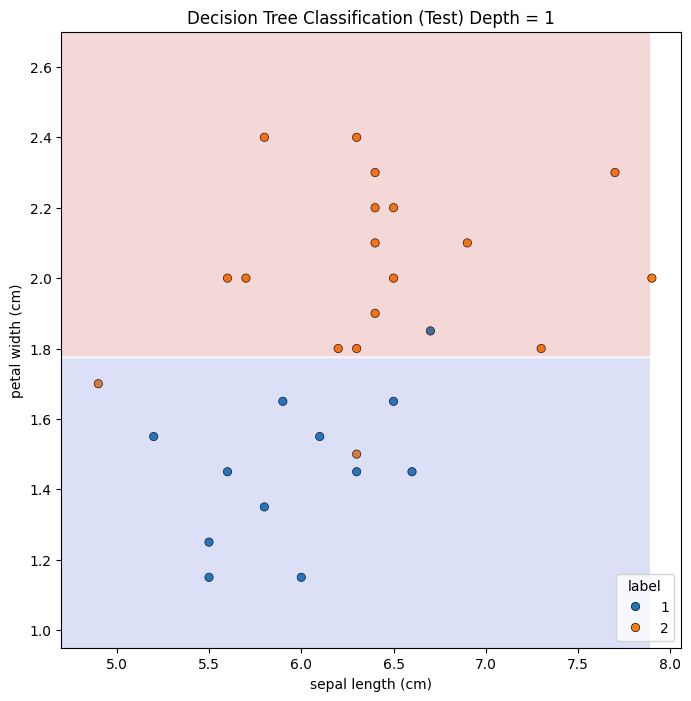

In [444]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'test', 'Decision Tree Classification (Test) Depth = 1')

In [445]:
print('Depth = 1 Train Accuracy: {}'.format(clf.score(X_train, y_train)))
print('Depth = 1 Test Accuracy: {}'.format(clf.score(X_test, y_test)))

Depth = 1 Train Accuracy: 0.9428571428571428
Depth = 1 Test Accuracy: 0.9


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


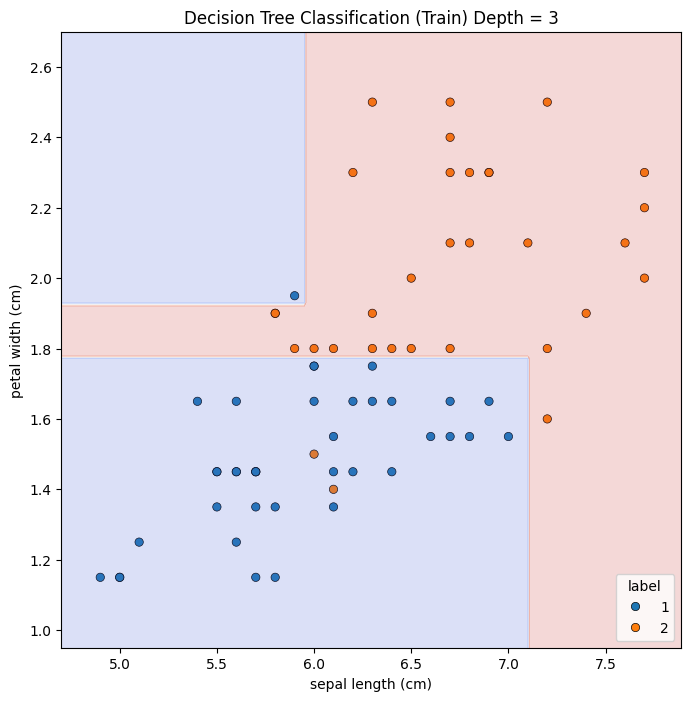

In [446]:
clf = DecisionTreeClassifier(max_depth = 3)

y_pred = clf.fit(X_train, y_train).predict(X_test)

plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Decision Tree Classification (Train) Depth = 3')

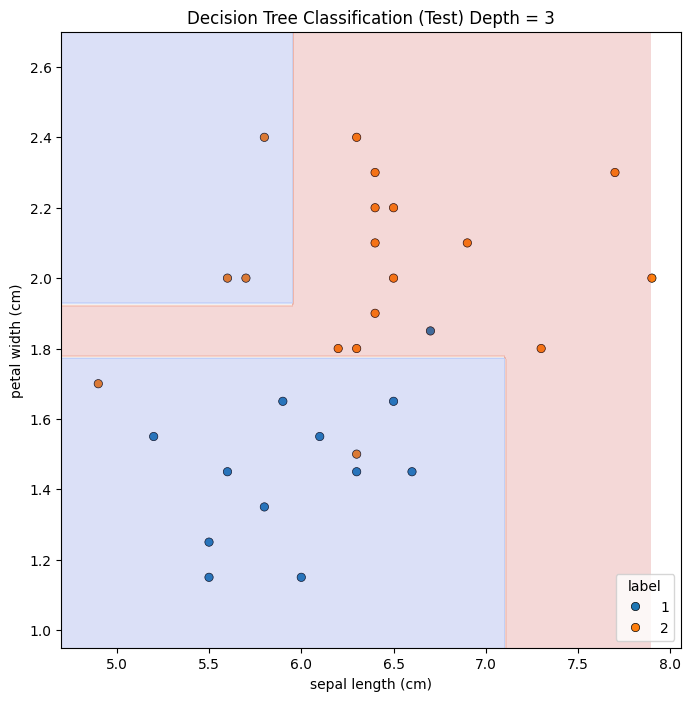

In [447]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'test', 'Decision Tree Classification (Test) Depth = 3')

In [448]:
print('Depth = 3 Train Accuracy: {}'.format(clf.score(X_train, y_train)))
print('Depth = 3 Test Accuracy: {}'.format(clf.score(X_test, y_test)))

Depth = 3 Train Accuracy: 0.9714285714285714
Depth = 3 Test Accuracy: 0.8


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


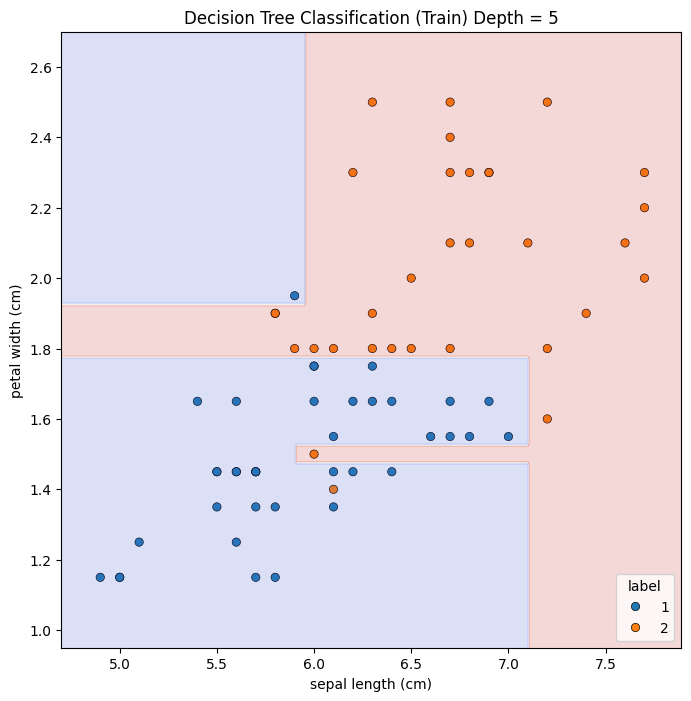

In [449]:
clf = DecisionTreeClassifier(max_depth = 5)

y_pred = clf.fit(X_train, y_train).predict(X_test)

plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'train', 'Decision Tree Classification (Train) Depth = 5')

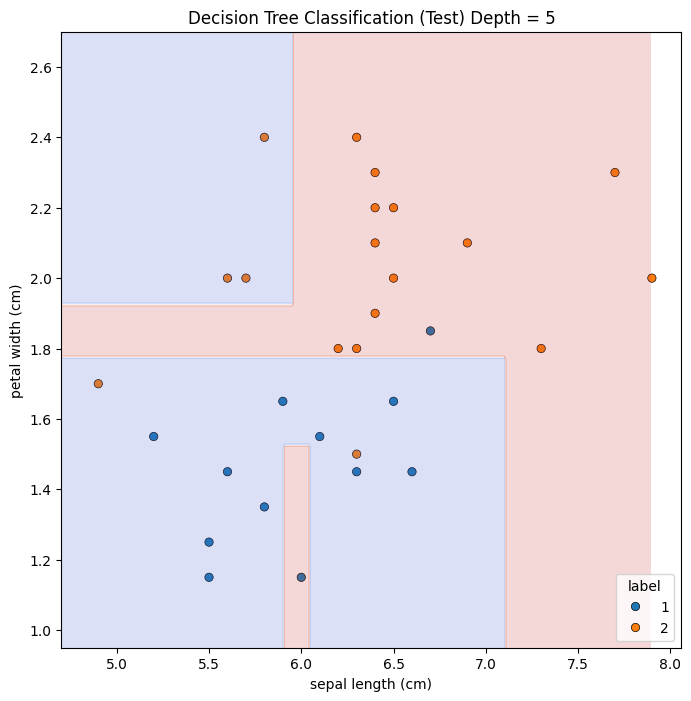

In [450]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, clf, 'test', 'Decision Tree Classification (Test) Depth = 5')

In [451]:
print('Depth = 5 Train Accuracy: {}'.format(clf.score(X_train, y_train)))
print('Depth = 5 Test Accuracy: {}'.format(clf.score(X_test, y_test)))

Depth = 5 Train Accuracy: 0.9857142857142858
Depth = 5 Test Accuracy: 0.7666666666666667


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


## 蘑菇分类例子

In [452]:
mushroom_df = pd.read_csv('mushrooms.csv')

mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [453]:
mushroom_df = pd.get_dummies(mushroom_df, 
                             columns = mushroom_df.drop(['class'], axis = 1).columns,
                             prefix = mushroom_df.drop(['class'], axis = 1).columns)

mushroom_df

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,e,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,e,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,p,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,e,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
8120,e,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
8121,e,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
8122,p,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [454]:
X = mushroom_df.drop(['class'], axis = 1)
y = mushroom_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf.score(X_test, y_test)

1.0

In [455]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1267
           p       1.00      1.00      1.00      1171

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [456]:
export_graphviz(clf, out_file = 'mushroom_tree_default.dot', 
                feature_names = X_train.columns,
                class_names = y_train.unique(),
                filled = True)

importance = clf.feature_importances_
fnames = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': fnames, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = True)

feature_importance_df = feature_importance_df[feature_importance_df['Importance'] != 0]

feature_importance_df

,Feature,Importance
35,gill-size_b,0.000018
1,cap-shape_c,0.000703
7,cap-surface_g,0.002105
109,population_y,0.005783
105,population_c,0.020864
22,odor_a,0.022267
25,odor_l,0.026424
100,spore-print-color_r,0.037536
63,stalk-surface-below-ring_y,0.095057
53,stalk-root_c,0.171891


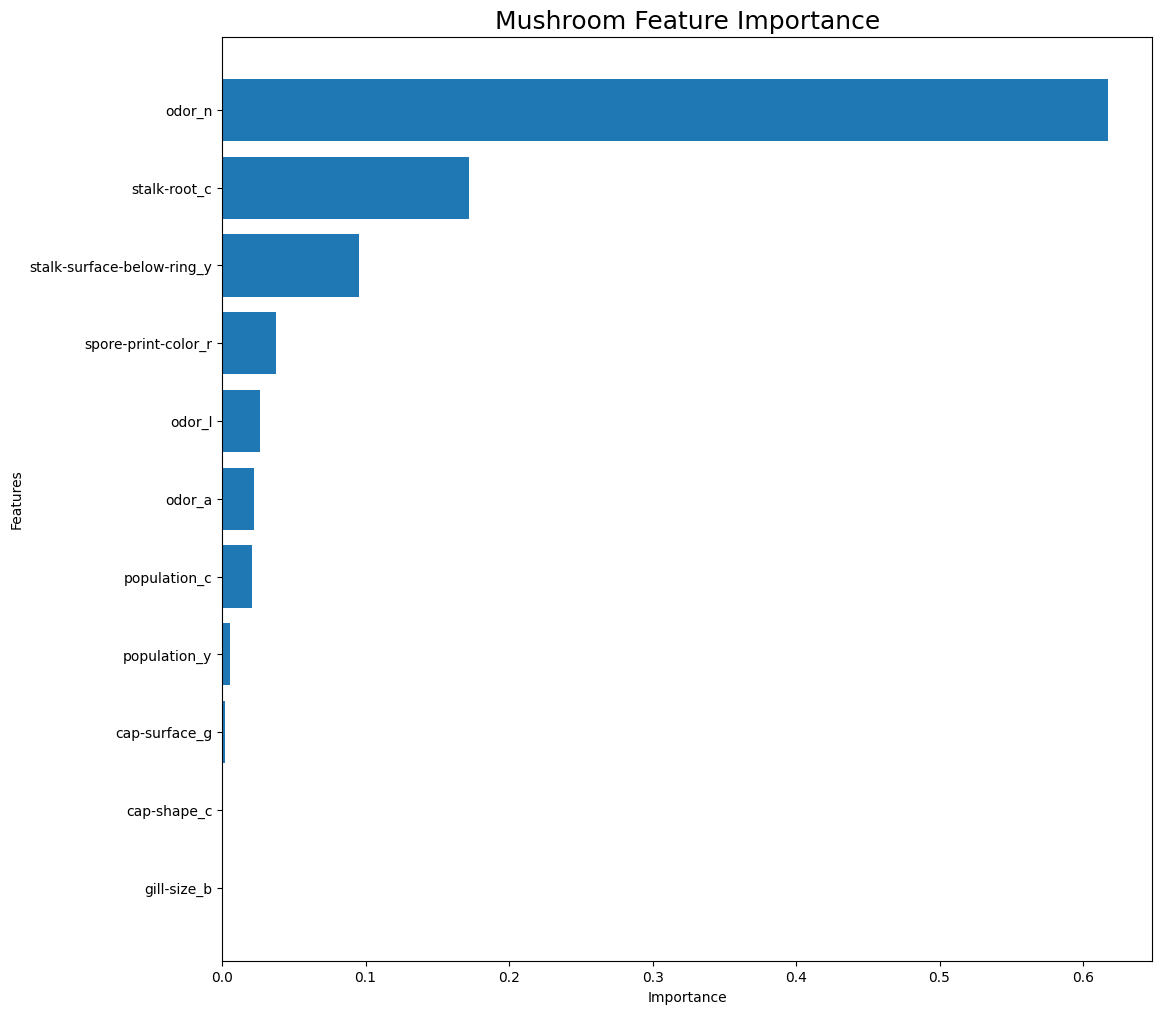

In [457]:
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)

ax.barh(y = feature_importance_df['Feature'], width = feature_importance_df['Importance'])

ax.set_title('Mushroom Feature Importance', fontsize = 18)
ax.set_xlabel('Importance')
ax.set_ylabel('Features')

plt.show()

## 心脏病回归

In [458]:
life_df = pd.read_csv('Life Expectancy Data.csv')
life_df = life_df.dropna()

life_df = life_df.drop(['Country', 'Status'], axis = 1).sample(n = 100, random_state = 13)
life_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2740 to 1449
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             100 non-null    int64  
 1   Life expectancy                  100 non-null    float64
 2   Adult Mortality                  100 non-null    float64
 3   infant deaths                    100 non-null    int64  
 4   Alcohol                          100 non-null    float64
 5   percentage expenditure           100 non-null    float64
 6   Hepatitis B                      100 non-null    float64
 7   Measles                          100 non-null    int64  
 8    BMI                             100 non-null    float64
 9   under-five deaths                100 non-null    int64  
 10  Polio                            100 non-null    float64
 11  Total expenditure                100 non-null    float64
 12  Diphtheria             

In [459]:
X = life_df[['Income composition of resources']]
y = life_df[['Life expectancy ']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

reg = DecisionTreeRegressor()

reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.4556092060140784

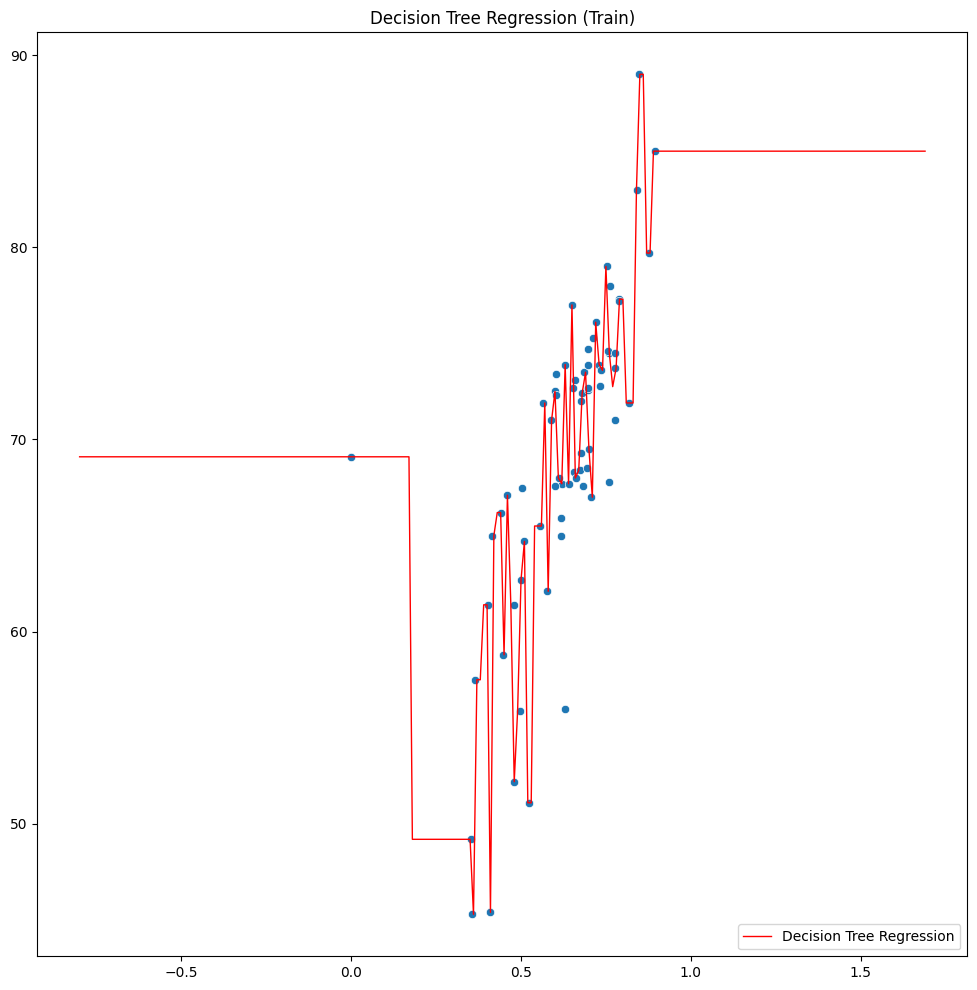

In [460]:
from ToolKit.ML import plot_fitted_curve1F2D

plot_fitted_curve1F2D(X_train, X_test, y_train, y_test, reg, 'train', 'Decision Tree Regression', 'Decision Tree Regression (Train)')

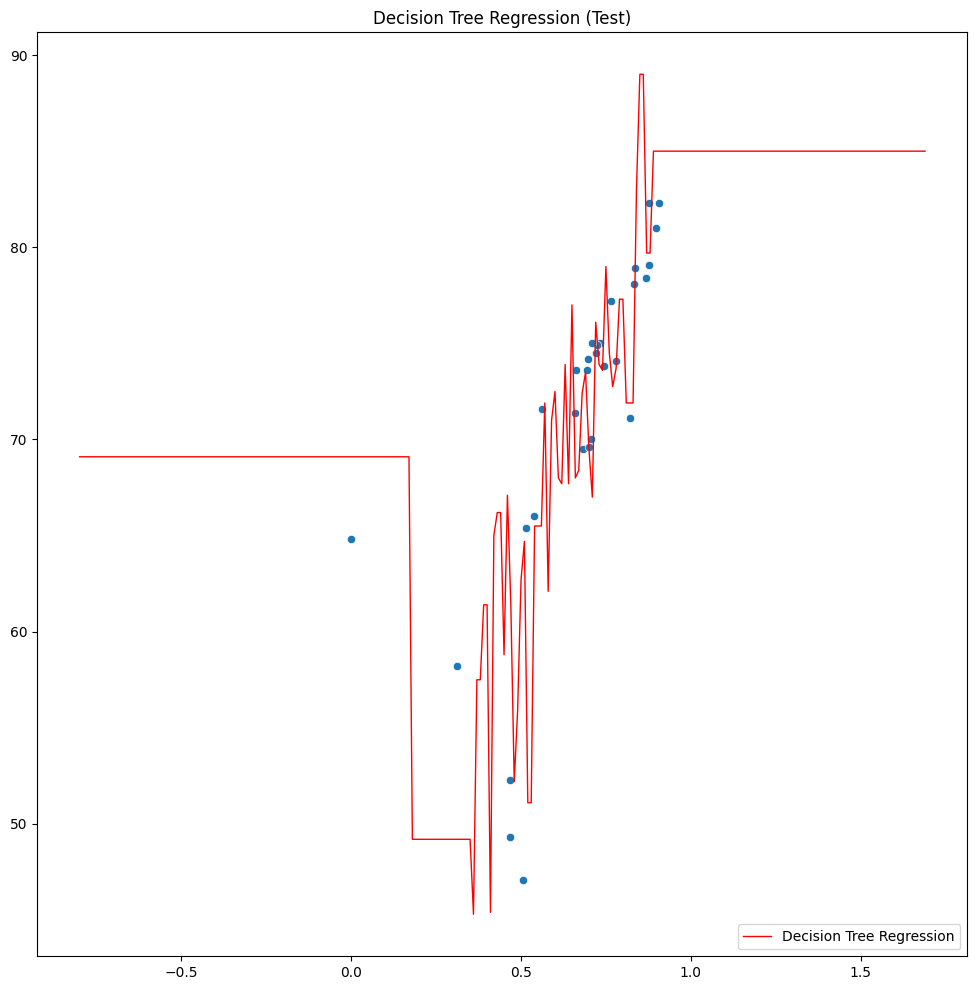

In [461]:
plot_fitted_curve1F2D(X_train, X_test, y_train, y_test, reg, 'test', 'Decision Tree Regression', 'Decision Tree Regression (Test)')